In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

Load Dataset

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()

In [3]:
display(boston.DESCR)

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [4]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
df['Price'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Dataset Analysis

In [6]:
#Description of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
#Summary of the dataset - statistics

df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
#Finding nulls
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

# Exploratory Data Analysis

  As this is the regression problem, 

1. we primarily check the corelation between the independent variables and the target variable.
2. Corelation between independent variables - multi collinearity

In [9]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


The pearson corelation ranges from -1 to 1.

From the corelation matrix, we can clearly see the variables are both positively corelated and negatively correlated. +ve relation tells us that if the independent feature value increases, price also increases and vice-versa.
-ve relation tells us that if the independent value increases, price decreases abd vice versa.



**observations:**

From the matrix, if we see the realtion between CRIM and Price -0.388305. It tells us that increase in crime rate can reduce the price of house in that area.
Simialrly other variables such as INDUS,NOX, AGE, RAD, TAX,PTRATIO and LSTAT are negatively correlated variables. LSTAT shows good linearity.

Similarly if we see the realtion between RM and Price 0.695360. It's obvious that increase in living rooms can increase the price of the house. The variables ZN, DIS, B are positively correlated variables.

The variable CHAS shows very less amount of correlation.

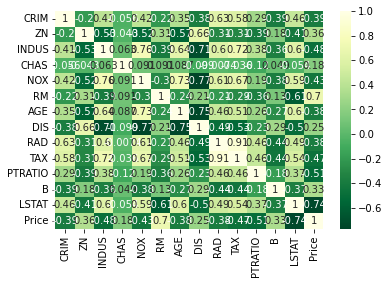

<Figure size 7200x6480 with 0 Axes>

In [10]:
import seaborn as sns
sns.heatmap(df.corr(),cmap="YlGn_r",annot=True)
plt.figure(figsize=(100,90))
plt.show()

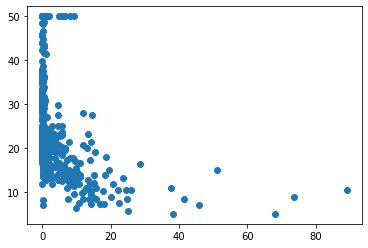

In [11]:
plt.scatter(df['CRIM'],df['Price'])

<AxesSubplot:xlabel='LSTAT', ylabel='Price'>

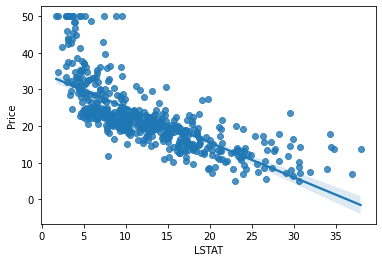

In [12]:
sns.regplot(x="LSTAT",y="Price",data = df)

#creates a simple regression plot with variance

<AxesSubplot:xlabel='RM', ylabel='Price'>

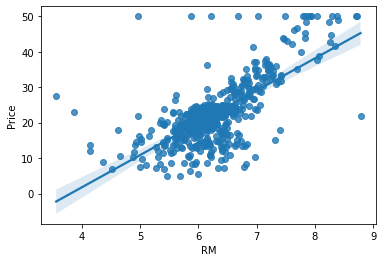

In [13]:
sns.regplot(x="RM",y="Price",data = df)

#creates a simple regression plot with variance

<AxesSubplot:xlabel='CHAS', ylabel='Price'>

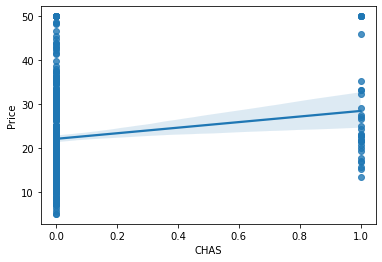

In [14]:
sns.regplot(x="CHAS",y="Price",data = df)

#creates a simple regression plot with variance

Preparing data for Modelling

Dependent Features: The variables which depend on other variables. When the independent variable changes, these also changes.

Independent Variables: The variables which are not affected by other variables.

In [15]:
#Creating dependent and independent features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [16]:
#Splitting the model into train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# **Standard Scaler:**

Why do we need scaling?

Internally, we use gradient descent.Our main aim is to come to the global minimum. To reach the global minimum all the features units should be in same scale. Because of that convergence will happen quickly and we'll reach the global minumum

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-0.34772922, -0.49832749,  1.5617021 , ...,  1.25792489,
         0.41641935,  0.57725848],
       [ 0.7060262 , -0.49832749,  1.01033562, ...,  0.80806948,
         0.25785696,  0.72535974],
       [ 0.41120031, -0.49832749,  1.01033562, ...,  0.80806948,
        -0.54173383,  0.90252761],
       ...,
       [ 0.05563265, -0.49832749,  1.01033562, ...,  0.80806948,
         0.37479275, -0.01653069],
       [-0.33988968, -0.49832749, -0.43863804, ...,  1.16795381,
         0.44003953, -0.62692935],
       [-0.23282185, -0.49832749, -0.43863804, ...,  1.16795381,
        -1.13382716,  1.04509237]])

In [20]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

# Model Training

In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [20]:
reg.fit(X_train,y_train)

LinearRegression()

In [21]:
reg.coef_, reg.intercept_

(array([-0.99052219,  1.18252257,  0.22898774,  0.38939877, -2.31314042,
         2.42567293,  0.22942055, -3.117995  ,  2.83974281, -2.02126939,
        -2.20082086,  0.93195735, -3.85405988]),
 22.493564356435638)

In [22]:
#parameters model has been trained
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [23]:
#prediction of test data
predictions = reg.predict(X_test)

**Analysing the predictions**

Text(0, 0.5, 'Predictions')

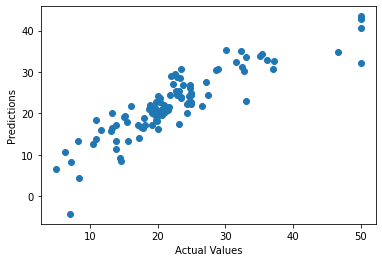

In [24]:
#actual - y_test
#prediction - predictions

plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predictions")

C:\Users\naark\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

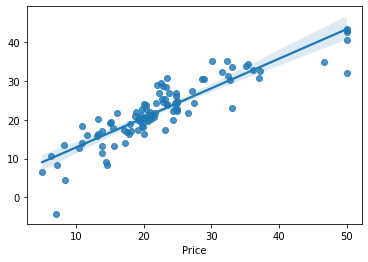

In [25]:
sns.regplot(y_test, predictions)

In [26]:
#Plotting the residuals(error) 
residual = y_test - predictions
residual

438    4.041246
64     9.991869
434   -4.278987
475   -3.060338
304    3.206716
         ...   
298   -6.993442
208    2.051015
470   -0.670666
168   -3.022992
341    2.517583
Name: Price, Length: 102, dtype: float64

C:\Users\naark\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

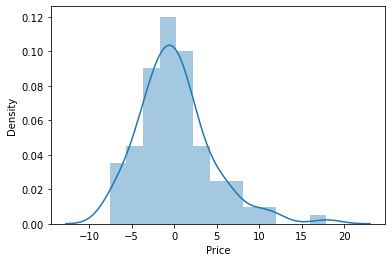

In [27]:
sns.distplot(residual)

From the graph, we can observe for most of the observations the residuals are 0 and it is following the normal distribution. There are few outliers we can observe at the right tail of the plot


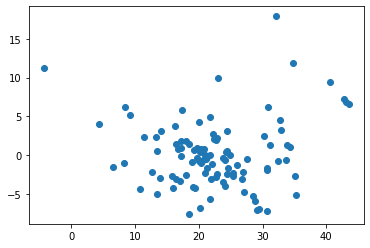

In [28]:
#Scatter plot between prediction and error
plt.scatter(predictions, residual)

# Metrics

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("Mean Absolute error:", mean_absolute_error(y_test,predictions))
print("Mean squared error:", mean_squared_error(y_test,predictions))
print("root Mean squared error:", np.sqrt(mean_squared_error(y_test,predictions)))

Mean Absolute error: 3.1615894913441287
Mean squared error: 18.64023353133147
root Mean squared error: 4.317433674224941


In [30]:
#r2 square and adjusted r2 score

from sklearn.metrics import r2_score
print("R2 score :", r2_score(y_test,predictions))
score = r2_score(y_test,predictions)

R2 score : 0.7956335728829937


In [31]:
#adjusted r2 score
print(1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.7654430779679815


# Saving the Model

In [32]:
import pickle

In [33]:
pickle.dump(reg, open('boston.pkl','wb'))

In [34]:
picked_model = pickle.load(open('boston.pkl','rb'))

In [39]:
picked_model.predict(boston.data[0].reshape(1,-1))

array([-217.21627833])

In [40]:
picked_model.predict(scaler.transform(boston.data[0].reshape(1,-1)))

array([30.10416828])

In [41]:
boston.target[0]

24.0